# Understanding the Russell Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [5]:
# Load in the data files
daily_prices = pd.read_csv("russell_3k_updated/russell_3k_daily_prices.csv", index_col=0)

In [17]:
daily_prices.shape

(5705612, 8)

In [18]:
daily_prices.tail(25)

Price           Adj Close               Close                High  \
2492  2025-05-14  2.0999999046325684  2.0999999046325684  2.2100000381469727   
2493  2025-05-15   2.190000057220459   2.190000057220459                2.25   
2494  2025-05-16  2.4800000190734863  2.4800000190734863   2.509999990463257   
2495  2025-05-19   2.359999895095825   2.359999895095825   2.450000047683716   
2496  2025-05-20  2.4700000286102295  2.4700000286102295  2.5199999809265137   
2497  2025-05-21  2.2699999809265137  2.2699999809265137  2.4600000381469727   
2498  2025-05-22   2.299999952316284   2.299999952316284   2.380000114440918   
2499  2025-05-23   2.390000104904175   2.390000104904175  2.4000000953674316   
2500  2025-05-27  2.5899999141693115  2.5899999141693115  2.6600000858306885   
2501  2025-05-28   2.490000009536743   2.490000009536743   2.609999895095825   
2502  2025-05-29   2.369999885559082   2.369999885559082  2.5299999713897705   
2503  2025-05-30  2.3399999141693115  2.3399999141693115   2.430000066757202   
2504  2025-06-02  2.0199999809265137  2.0199999809265137  2.3499999046325684   
2505  2025-06-03   2.140000104904175   2.140000104904175  2.1700000762939453   
2506  2025-06-04  2.1500000953674316  2.1500000953674316                2.25   
2507  2025-06-05   2.130000114440918   2.130000114440918   2.200000047683716   
2508  2025-06-06   2.180000066757202   2.180000066757202  2.2699999809265137   
2509  2025-06-09   2.190000057220459   2.190000057220459   2.259999990463257   
2510  2025-06-10   2.190000057220459   2.190000057220459                2.25   
2511  2025-06-11  2.0399999618530273  2.0399999618530273  2.2200000286102295   
2512  2025-06-12   2.069999933242798   2.069999933242798   2.130000114440918   
2513  2025-06-13  2.0999999046325684  2.0999999046325684   2.140000104904175   
2514  2025-06-16   2.369999885559082   2.369999885559082   2.380000114440918   
2515  2025-06-17   2.359999895095825   2.359999895095825  2.4700000286102295   
2516  2025-06-18  2.4100000858306885  2.4100000858306885  2.4600000381469727   

                     Low                Open  Volume Ticker  
2492  2.0999999046325684  2.1700000762939453  101600   ZYXI  
2493   2.069999933242798  2.0899999141693115  152700   ZYXI  
2494  2.1600000858306885  2.2100000381469727  257800   ZYXI  
2495  2.3299999237060547   2.450000047683716   81600   ZYXI  
2496  2.3299999237060547  2.3399999141693115  106500   ZYXI  
2497  2.2699999809265137  2.4200000762939453  115300   ZYXI  
2498  2.2100000381469727   2.259999990463257  132000   ZYXI  
2499  2.2300000190734863  2.2300000190734863  121900   ZYXI  
2500  2.4000000953674316  2.4000000953674316  300900   ZYXI  
2501  2.4000000953674316   2.559999942779541  126900   ZYXI  
2502   2.359999895095825   2.509999990463257  103100   ZYXI  
2503   2.200000047683716   2.359999895095825  453900   ZYXI  
2504  1.9900000095367432  2.3499999046325684  458600   ZYXI  
2505  1.9900000095367432   2.109999895095825  676200   ZYXI  
2506   2.140000104904175   2.140000104904175  158900   ZYXI  
2507   2.119999885559082   2.180000066757202   55500   ZYXI  
2508  2.1500000953674316   2.180000066757202  187200   ZYXI  
2509   2.130000114440918   2.200000047683716  114000   ZYXI  
2510   2.190000057220459  2.2100000381469727  101700   ZYXI  
2511  2.0299999713897705   2.180000066757202  101200   ZYXI  
2512  1.9900000095367432   2.049999952316284  176200   ZYXI  
2513                 2.0  2.0199999809265137   99600   ZYXI  
2514  2.0799999237060547   2.130000114440918  179000   ZYXI  
2515  2.2799999713897705   2.369999885559082  182500   ZYXI  
2516   2.309999942779541  2.3399999141693115  157300   ZYXI

In [23]:
# Check the columns and structure of the data
print("Columns:", daily_prices.columns.tolist())

# Check the index (which should be dates)
print(f"\nIndex name: {daily_prices.index.name}")
print(f"Sample index values: {daily_prices.index[:5].tolist()}")

# Transform the dataframe: pivot so tickers are index, dates are columns, close prices are values
daily_prices_pivoted = daily_prices.pivot_table(
    index='Ticker',
    columns=daily_prices.index,  # Use the current index (dates) as columns
    values='Close',
    aggfunc='first'  # In case there are any duplicates, take the first value
)

print(f"\nOriginal shape: {daily_prices.shape}")
print(f"Pivoted shape: {daily_prices_pivoted.shape}")
print(f"\nPivoted dataframe preview:")
daily_prices_pivoted.head()

Columns: ['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']

Index name: None
Sample index values: [0, 1, 2, 3, 4]

Original shape: (5705612, 8)
Pivoted shape: (2633, 2515)

Pivoted dataframe preview:

Original shape: (5705612, 8)
Pivoted shape: (2633, 2515)

Pivoted dataframe preview:


2                   3                   4     \
Ticker                                                               
A         39.4900016784668  39.810001373291016  39.599998474121094   
AA      28.667789459228516  28.259279251098633  28.211219787597656   
AAL     41.560001373291016  43.029998779296875   42.72999954223633   
AAMI     18.34000015258789   18.43000030517578  18.469999313354492   
AAOI    18.360000610351562  18.010000228881836  17.989999771118164   

                      5                   6                   7     \
Ticker                                                               
A       40.189998626708984   40.04999923706055   40.02000045776367   
AA      28.211219787597656  27.802709579467773    28.0910701751709   
AAL       42.2400016784668    42.2400016784668  41.439998626708984   
AAMI    18.079999923706055  17.739999771118164  17.889999389648438   
AAOI    19.200000762939453    19.1299991607666  18.709999084472656   

                      8                   9                   10    \
Ticker                                                               
A         38.7400016784668   38.58000183105469    39.2599983215332   
AA      27.274049758911133   26.79344940185547   26.60120964050293   
AAL                  39.75  39.939998626708984   38.79999923706055   
AAMI    17.469999313354492  17.790000915527344  17.790000915527344   
AAOI    17.329999923706055  17.360000610351562   18.06999969482422   

                      11    ...                2507                2508  \
Ticker                      ...                                           
A        39.58000183105469  ...  113.94000244140625  115.80000305175781   
AA       26.67329978942871  ...    27.8700008392334  28.010000228881836   
AAL     39.029998779296875  ...  11.270000457763672  11.779999732971191   
AAMI    17.690000534057617  ...  30.059999465942383  30.489999771118164   
AAOI    17.059999465942383  ...  16.260000228881836  16.829999923706055   

                      2509                2510                2511  \
Ticker                                                               
A       116.73999786376953   120.5199966430664  119.72000122070312   
AA      28.559999465942383  28.760000228881836  28.739999771118164   
AAL     11.760000228881836   11.84000015258789    11.0600004196167   
AAMI    31.209999084472656  31.450000762939453  31.549999237060547   
AAOI      16.8700008392334  16.440000534057617   16.31999969482422   

                      2512                2513                2514  \
Ticker                                                               
A       118.91000366210938  117.08000183105469   119.0199966430664   
AA      28.860000610351562  28.350000381469727  29.010000228881836   
AAL     10.899999618530273  10.369999885559082  10.899999618530273   
AAMI    31.739999771118164   31.15999984741211  31.700000762939453   
AAOI    16.920000076293945  15.470000267028809   17.09000015258789   

                      2515                2516  
Ticker                                          
A       116.08999633789062   115.5199966430664  
AA      28.719999313354492  28.350000381469727  
AAL       10.5600004196167  10.579999923706055  
AAMI      31.3799991607666  31.440000534057617  
AAOI    16.780000686645508  19.770000457763672  

[5 rows x 2515 columns]

In [24]:
# Assign the transformed data to a more convenient variable name
daily_prices_matrix = daily_prices_pivoted

# Show some key statistics about the transformed matrix
print("Transformed Daily Prices Matrix Summary:")
print(f"Number of tickers (rows): {daily_prices_matrix.shape[0]}")
print(f"Number of trading days (columns): {daily_prices_matrix.shape[1]}")
print(f"Date range: {daily_prices_matrix.columns.min()} to {daily_prices_matrix.columns.max()}")
print(f"Sample tickers: {daily_prices_matrix.index[:10].tolist()}")

# Check for missing values
missing_percentage = (daily_prices_matrix.isnull().sum().sum() / (daily_prices_matrix.shape[0] * daily_prices_matrix.shape[1])) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Transformed Daily Prices Matrix Summary:
Number of tickers (rows): 2633
Number of trading days (columns): 2515
Date range: 2 to 2516
Sample tickers: ['A', 'AA', 'AAL', 'AAMI', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'ABBV']
Percentage of missing values: 13.92%


In [25]:
daily_prices_pivoted

2                   3                   4     \
Ticker                                                                
A          39.4900016784668  39.810001373291016  39.599998474121094   
AA       28.667789459228516  28.259279251098633  28.211219787597656   
AAL      41.560001373291016  43.029998779296875   42.72999954223633   
AAMI      18.34000015258789   18.43000030517578  18.469999313354492   
AAOI     18.360000610351562  18.010000228881836  17.989999771118164   
...                     ...                 ...                 ...   
ZUMZ     26.309999465942383  27.290000915527344  28.059999465942383   
ZVRA                  292.0   312.9599914550781   312.1600036621094   
ZWS      25.989999771118164   26.09000015258789  25.469999313354492   
ZYME                   13.0  13.069999694824219  13.100000381469727   
ZYXI    0.17272700369358063  0.1636359989643097  0.1636359989643097   

                      5                   6                   7     \
Ticker                                                               
A       40.189998626708984   40.04999923706055   40.02000045776367   
AA      28.211219787597656  27.802709579467773    28.0910701751709   
AAL       42.2400016784668    42.2400016784668  41.439998626708984   
AAMI    18.079999923706055  17.739999771118164  17.889999389648438   
AAOI    19.200000762939453    19.1299991607666  18.709999084472656   
...                    ...                 ...                 ...   
ZUMZ    27.649999618530273  27.709999084472656  27.649999618530273   
ZVRA     292.9599914550781   292.6400146484375   302.7200012207031   
ZWS     25.239999771118164    24.8799991607666  24.399999618530273   
ZYME    13.279999732971191  13.109999656677246  13.050000190734863   
ZYXI    0.1636359989643097  0.1636359989643097  0.1636359989643097   

                       8                    9                    10    \
Ticker                                                                  
A          38.7400016784668    38.58000183105469     39.2599983215332   
AA       27.274049758911133    26.79344940185547    26.60120964050293   
AAL                   39.75   39.939998626708984    38.79999923706055   
AAMI     17.469999313354492   17.790000915527344   17.790000915527344   
AAOI     17.329999923706055   17.360000610351562    18.06999969482422   
...                     ...                  ...                  ...   
ZUMZ     26.450000762939453     26.6299991607666    26.93000030517578   
ZVRA      292.9599914550781    293.9200134277344   284.79998779296875   
ZWS      23.450000762939453    23.90999984741211   24.049999237060547   
ZYME     13.029999732971191                 13.0    13.09000015258789   
ZYXI    0.18181799352169037  0.18181799352169037  0.18181799352169037   

                       11    ...                2507                2508  \
Ticker                       ...                                           
A         39.58000183105469  ...  113.94000244140625  115.80000305175781   
AA        26.67329978942871  ...    27.8700008392334  28.010000228881836   
AAL      39.029998779296875  ...  11.270000457763672  11.779999732971191   
AAMI     17.690000534057617  ...  30.059999465942383  30.489999771118164   
AAOI     17.059999465942383  ...  16.260000228881836  16.829999923706055   
...                     ...  ...                 ...                 ...   
ZUMZ      26.65999984741211  ...  12.859999656677246  11.579999923706055   
ZVRA      284.6400146484375  ...   8.829999923706055   9.260000228881836   
ZWS      23.739999771118164  ...    36.2599983215332   36.52000045776367   
ZYME      13.09000015258789  ...                 NaN                 NaN   
ZYXI    0.18181799352169037  ...   2.130000114440918   2.180000066757202   

                      2509                2510                2511  \
Ticker                                                               
A       116.73999786376953   120.5199966430664  119.72000122070312   
AA      28.559999465942383  28.76000022

# Fundamentals Dataset
- These might be the Static Variables

In [11]:
# load in the fundamentals file
fundamentals = pd.read_csv("russell_3k_updated/russell_3k_fundamentals.csv", index_col=0)
fundamentals.shape

(6850, 15)

In [13]:
fundamentals.head(10)

Ticker  Year     MarketCap  TrailingPE  PriceToBook  PriceToSales  \
0     AA  2024  9.259132e+09  154.318868     1.795449      0.778405   
1     AA  2023  8.118999e+09  -12.471581     1.909903      0.769500   
2     AA  2022  1.262791e+10 -102.665966     2.487769      1.014209   
3     AA  2021  1.555231e+10   36.252476     3.328834      1.279815   
0    AAL  2024  1.160741e+10   13.720345    -2.918635      0.214115   
1    AAL  2023  9.483783e+09   11.537448    -1.823103      0.179658   
2    AAL  2022  9.635470e+09   75.869843    -1.661574      0.196759   
3    AAL  2021  1.271539e+10   -6.380026    -1.732342      0.425520   
0   AAON  2024  9.757277e+09   57.886419    11.832998      8.126764   
1   AAON  2023  5.879148e+09   33.099024     7.996404      5.031286   

   ReturnOnEquity  ReturnOnAssets  DebtToEquity  CurrentRatio  ProfitMargin  \
0        0.011635        0.004266      1.727167           NaN      0.005044   
1       -0.153140       -0.045991      2.329805           NaN     -0.061700   
2       -0.024232       -0.008336      1.907013           NaN     -0.009879   
3        0.091824        0.028552      2.215967           NaN      0.035303   
0       -0.212723        0.013693    -16.535077           NaN      0.015606   
1       -0.158016        0.013036    -13.121876           NaN      0.015572   
2       -0.021900        0.001962    -12.159855           NaN      0.002593   
3        0.271526       -0.029985    -10.055450           NaN     -0.066696   
0        0.204418        0.143426      0.425248           NaN      0.140392   
1        0.241590        0.188672      0.280475           NaN      0.152007   

   EpsGrowth5Y  RevenueGrowth  EpsGrowthYoY  Unnamed: 0  
0          NaN            NaN           NaN         NaN  
1          NaN      -0.112989    -11.850000         NaN  
2          NaN       0.180078      0.811060         NaN  
3          NaN      -0.024014      4.487805         NaN  
0          NaN            NaN           NaN         NaN  
1          NaN      -0.026249     -0.028369         NaN  
2          NaN      -0.072308     -0.845499         NaN  
3          NaN      -0.389802    -16.692913         NaN  
0       -0.686            NaN           NaN         NaN  
1       -0.686      -0.026750      0.053773         NaN

# Gics Sectors

In [14]:
# load in the Gics sectors
gics_sectors = pd.read_csv("russell_3k_updated/russell_3k_gics_sectors.csv", index_col=0)
gics_sectors.shape

(2651, 1)

In [15]:
gics_sectors.head(10)

Sector
Ticker                        
MSFT                Technology
NVDA                Technology
AAPL                Technology
AMZN         Consumer Cyclical
META    Communication Services
AVGO                Technology
GOOGL   Communication Services
TSLA         Consumer Cyclical
BRKB                       NaN
GOOG    Communication Services

<Axes: title={'center': 'GICS Sector Distribution'}, xlabel='Sector'>

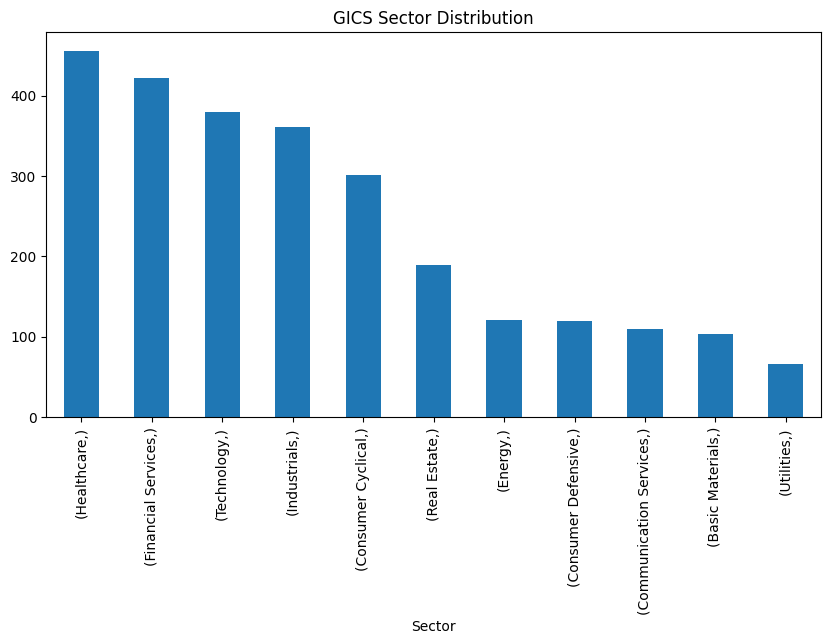

In [16]:
gics_sectors.value_counts().plot(kind='bar', figsize=(10, 5), title="GICS Sector Distribution")